# El problema XOR

## Problema XOR

Problema famoso del libro Perceptrons con datos 2d no linealmente separables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).astype(float)
y = np.array([0, 1, 1, 0]).astype(int)
print(np.c_[X, y])

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


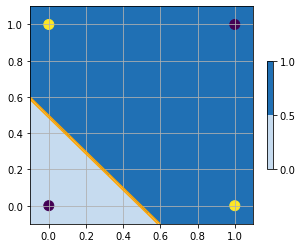

In [2]:
w = np.array([1, 1]); b = -0.5
P = lambda x: np.heaviside(w @ x + b, 0.0)
fig, ax = plt.subplots(1, 1, figsize=(5, 4)); ax.grid()
x1, x2 = np.meshgrid(np.linspace(-.1, 1.1, 50), np.linspace(-.1, 1.1, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
yy = np.apply_along_axis(P, 1, XX)
ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*X.T, c=y, s=100);

## Resolución de XOR con un MLP

XOR se resuelve con tres Perceptrones correspondientes a dos **unidades ocultas,** $h_1$ y $h_2$, y la salida $y$

In [3]:
import graphviz; graphviz.Source('''digraph { rankdir=BT
yb [label="1"] yb -> y [label="-0.5"] h1 -> y [label="-1"] h2 -> y [label="+1"]
h1b [label="1"] h1b -> h1 [label="-1.5"] x1 -> h1 [label="+1"] x2 -> h1 [label="+1"]
h2b [label="1"] h2b -> h2 [label="-0.5"] x1 -> h2 [label="+1"] x2 -> h2 [label="+1"]
}''').render('13.2.1 MLP', format='svg');

<div align="center">
<table><tr><td style="border: none;"><img src="13.2.1 MLP.svg" width="350"/></td><td style="border: none;">

|$x_1$|$x_2$|$\boldsymbol{w}_1^t\boldsymbol{x}+b_1$|$h_1$|$\boldsymbol{w}_2^t\boldsymbol{x}+b_2$|$h_2$|$\boldsymbol{w}_y^t\boldsymbol{h}+b_y$|$y$|
|-----|-----|--------------------------------------|-----|--------------------------------------|-----|--------------------------------------|---|
| $0$ | $0$ |                               $-1.5$ | $0$ |                               $-0.5$ | $0$ |                               $-0.5$ |$0$|
| $0$ | $1$ |                               $-0.5$ | $0$ |                               $+0.5$ | $1$ |                               $+0.5$ |$1$|
| $1$ | $0$ |                               $-0.5$ | $0$ |                               $+0.5$ | $1$ |                               $+0.5$ |$1$|
| $1$ | $1$ |                               $+0.5$ | $1$ |                               $+1.5$ | $1$ |                               $-0.5$ |$0$|

$$y=\neg h_1\wedge h_2=\neg(x_1\wedge x_2)\wedge(x_1\vee x_2)$$

</td><tr></table>
</div>

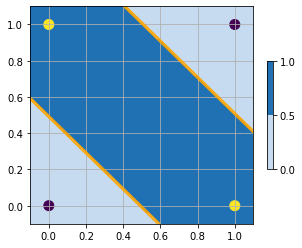

In [4]:
w1 = np.array([1, 1]); b1 = -1.5; w2 = np.array([1, 1]); b2 = -0.5; wy = np.array([-1, 1]); by = -0.5
P = lambda x, w, b: np.heaviside(w @ x + b, 0.0)
MLPXOR = lambda x: P(np.array([P(x, w1, b1), P(x, w2, b2)]), wy, by)
fig, ax = plt.subplots(1, 1, figsize=(5, 4)); ax.grid()
x1, x2 = np.meshgrid(np.linspace(-.1, 1.1, 50), np.linspace(-.1, 1.1, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
yy = np.apply_along_axis(MLPXOR, 1, XX)
ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*X.T, c=y, s=100);